In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
train_set = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Naive Bayes\SalaryData_Train.csv")
test_set = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Naive Bayes\SalaryData_Test.csv")

In [3]:
train_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_set.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
test_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
test_set.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
test_set.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train_set.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
train_set.duplicated().sum()

3258

In [10]:
test_set.duplicated().sum()

930

In [11]:
train_set = train_set.drop_duplicates()
test_set = test_set.drop_duplicates()

In [12]:
train_set.duplicated().sum(),test_set.duplicated().sum()

(0, 0)

In [13]:
train_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
train_df = pd.get_dummies(train_set,columns=['workclass','education','educationno','maritalstatus','occupation','relationship','race','native'])

In [15]:
train_df.head()

,age,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,Male,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Male,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Male,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Male,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Female,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
train_df1 = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Naive Bayes\SalaryData_Train.csv")

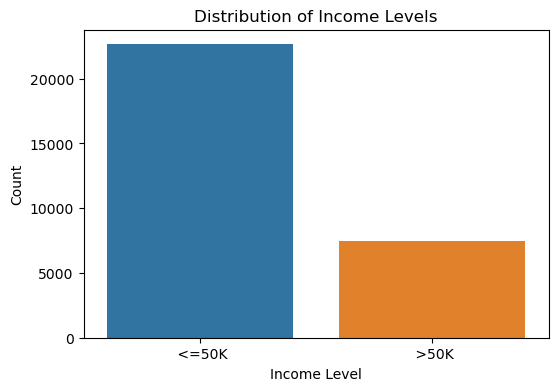

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Salary', data=train_df1)
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Levels')
plt.show()

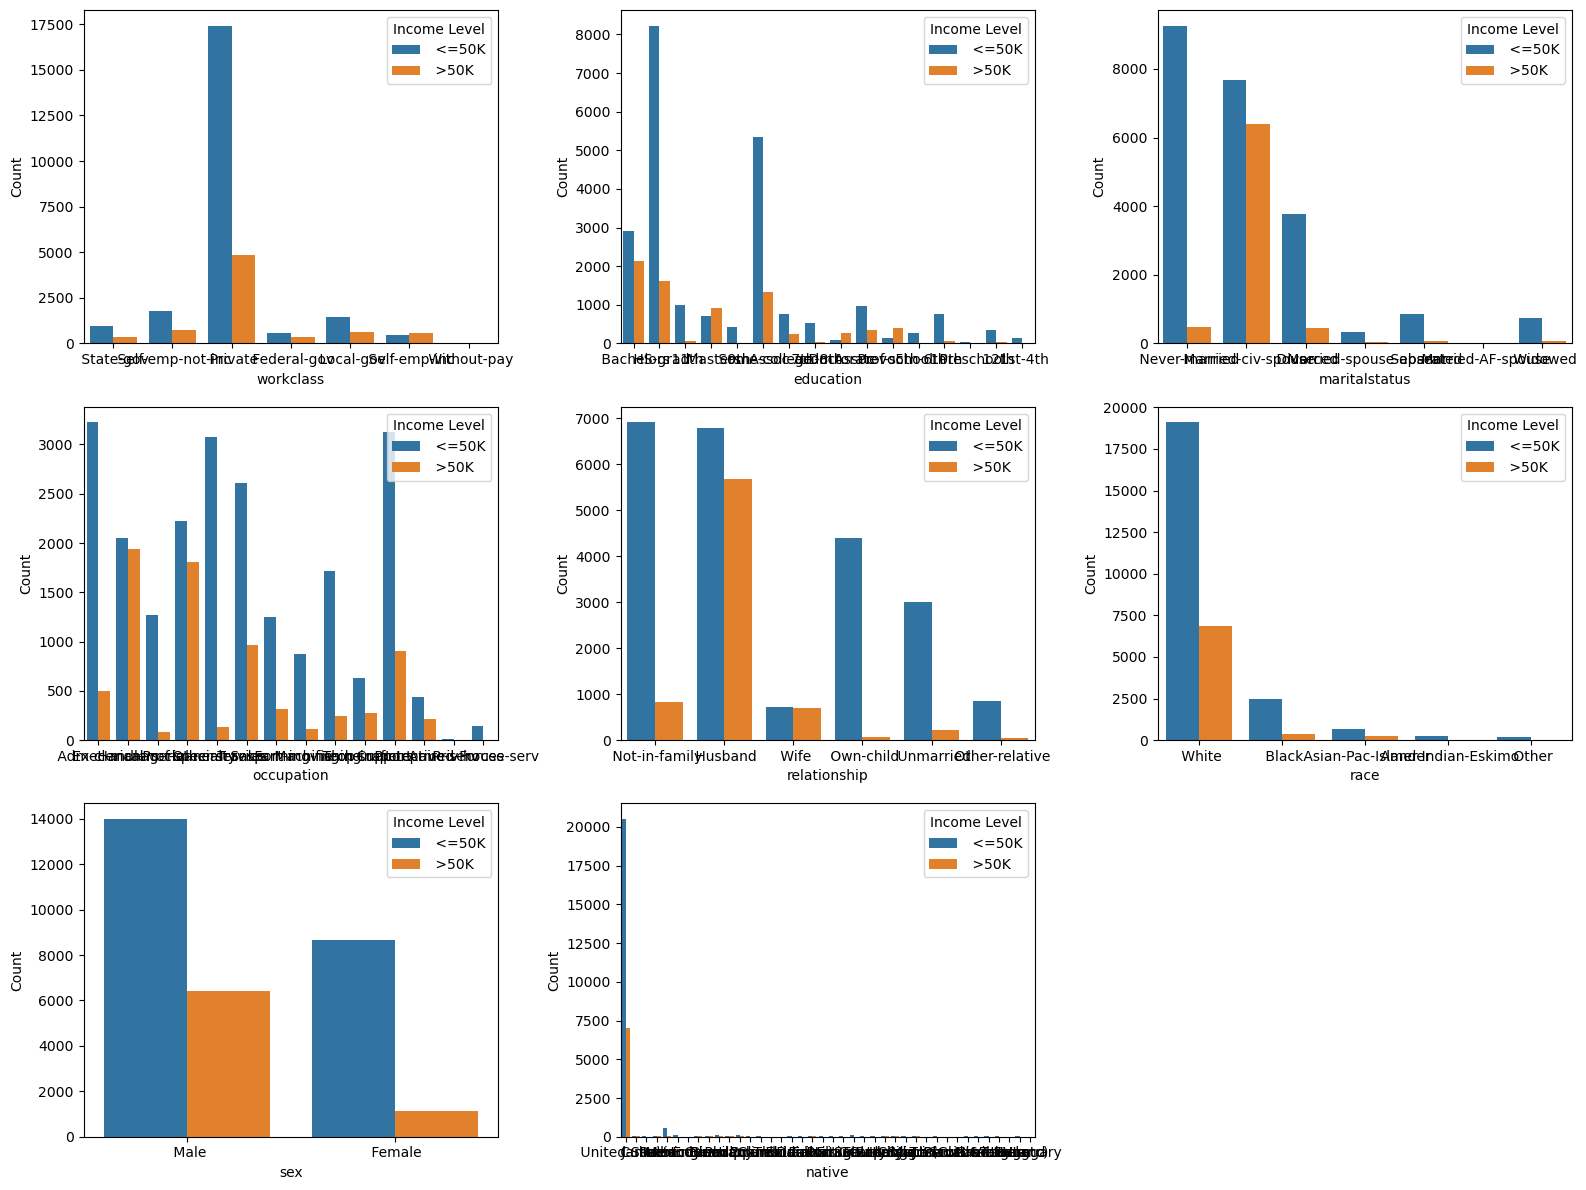

In [40]:
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
plt.figure(figsize=(16, 12))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.countplot(x=feature, data=train_df1, hue='Salary')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Income Level', loc='upper right')
plt.tight_layout()
plt.show()

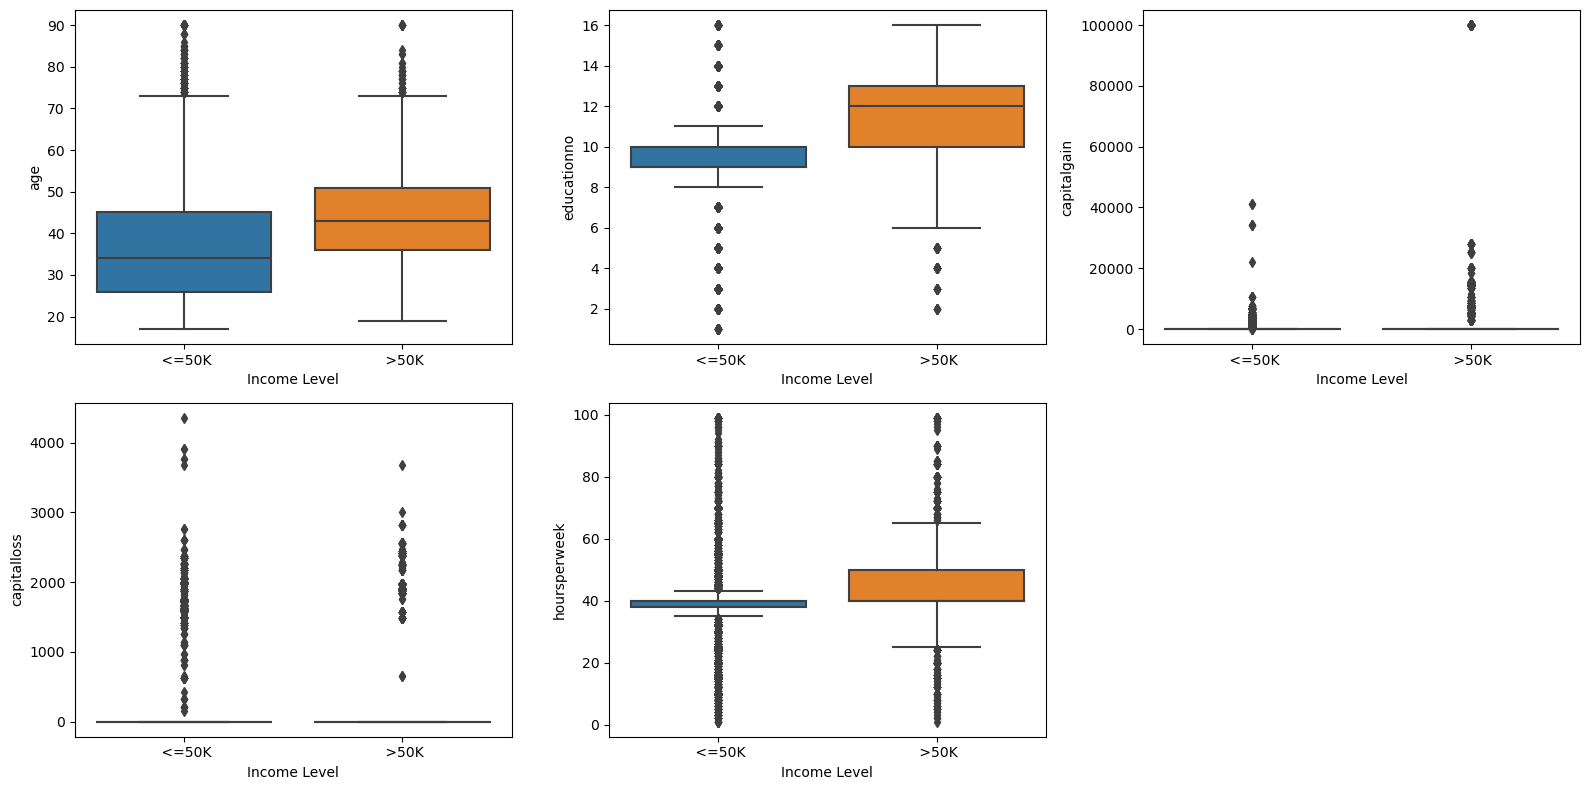

In [41]:
numeric_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
plt.figure(figsize=(16, 8))
for feature in numeric_features:
    plt.subplot(2, 3, numeric_features.index(feature) + 1)
    sns.boxplot(x='Salary', y=feature, data=train_df1)
    plt.xlabel('Income Level')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [16]:
temp_df = train_set.iloc[:,-1]
temp_df

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30154      >50K
30155     <=50K
30156     <=50K
30158     <=50K
30160      >50K
Name: Salary, Length: 26903, dtype: object

In [17]:
train_df = train_df.drop('Salary',axis=1)

In [18]:
train_df = pd.concat([train_df,temp_df],axis=1)

In [19]:
train_df.Salary.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [20]:
train_df = train_df.replace(False,0).replace(True,1).replace(' Male',1).replace(' Female',0).replace(' <=50K',0).replace(' >50K',1)
train_df.head()

,age,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,1,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,1,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_df.sex.value_counts()

1    17961
0     8942
Name: sex, dtype: int64

# For Test data

In [22]:
test_df = pd.get_dummies(test_set,columns=['workclass','education','educationno','maritalstatus','occupation','relationship','race','native'])

In [23]:
temp_df = test_set.iloc[:,-1]
temp_df

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 14130, dtype: object

In [24]:
test_df = test_df.drop('Salary',axis=1)
test_df = pd.concat([test_df,temp_df],axis=1)
# test_df.Salary.value_counts()
test_df = test_df.replace(False,0).replace(True,1).replace(' Male',1).replace(' Female',0).replace(' <=50K',0).replace(' >50K',1)
test_df.head()

,age,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,1,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,1,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,1,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,1,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
test_set1 = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Naive Bayes\SalaryData_Test.csv")

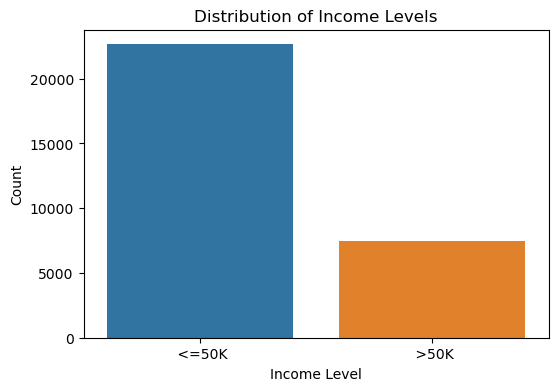

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Salary', data=train_set1)
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Levels')
plt.show()

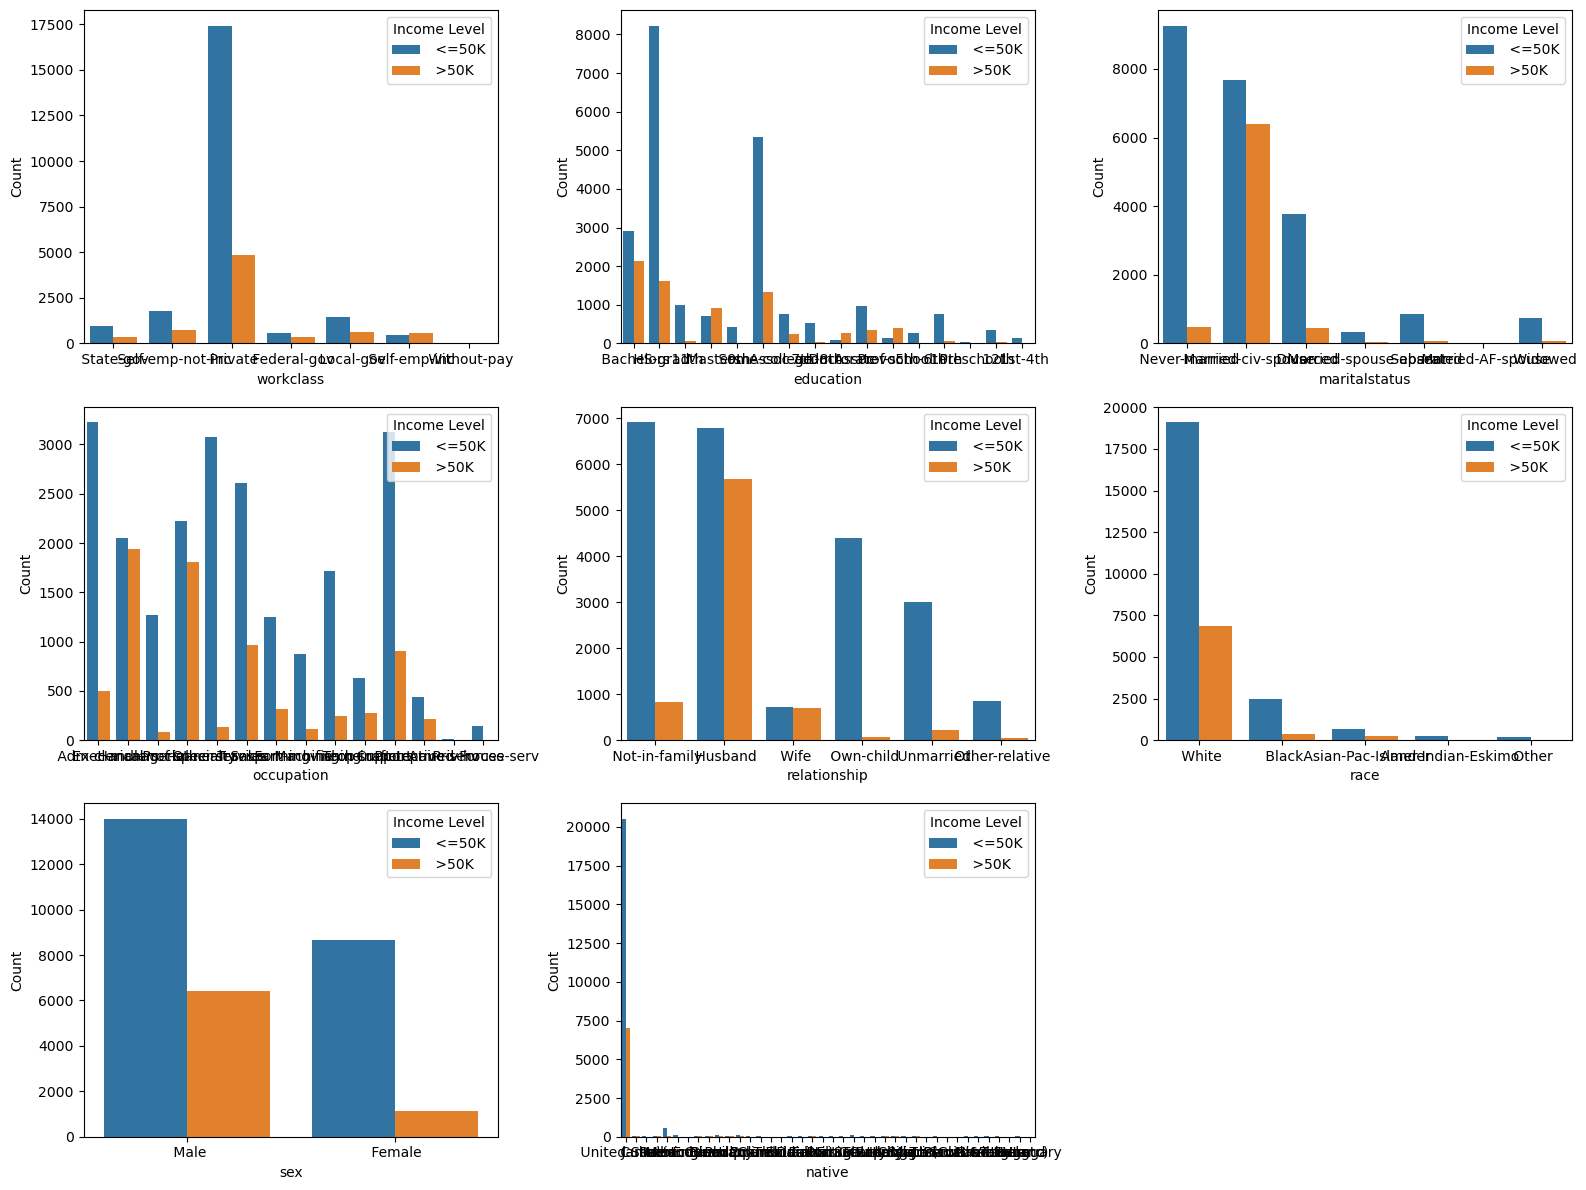

In [44]:
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
plt.figure(figsize=(16, 12))
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.countplot(x=feature, data=train_set1, hue='Salary')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Income Level', loc='upper right')
plt.tight_layout()
plt.show()

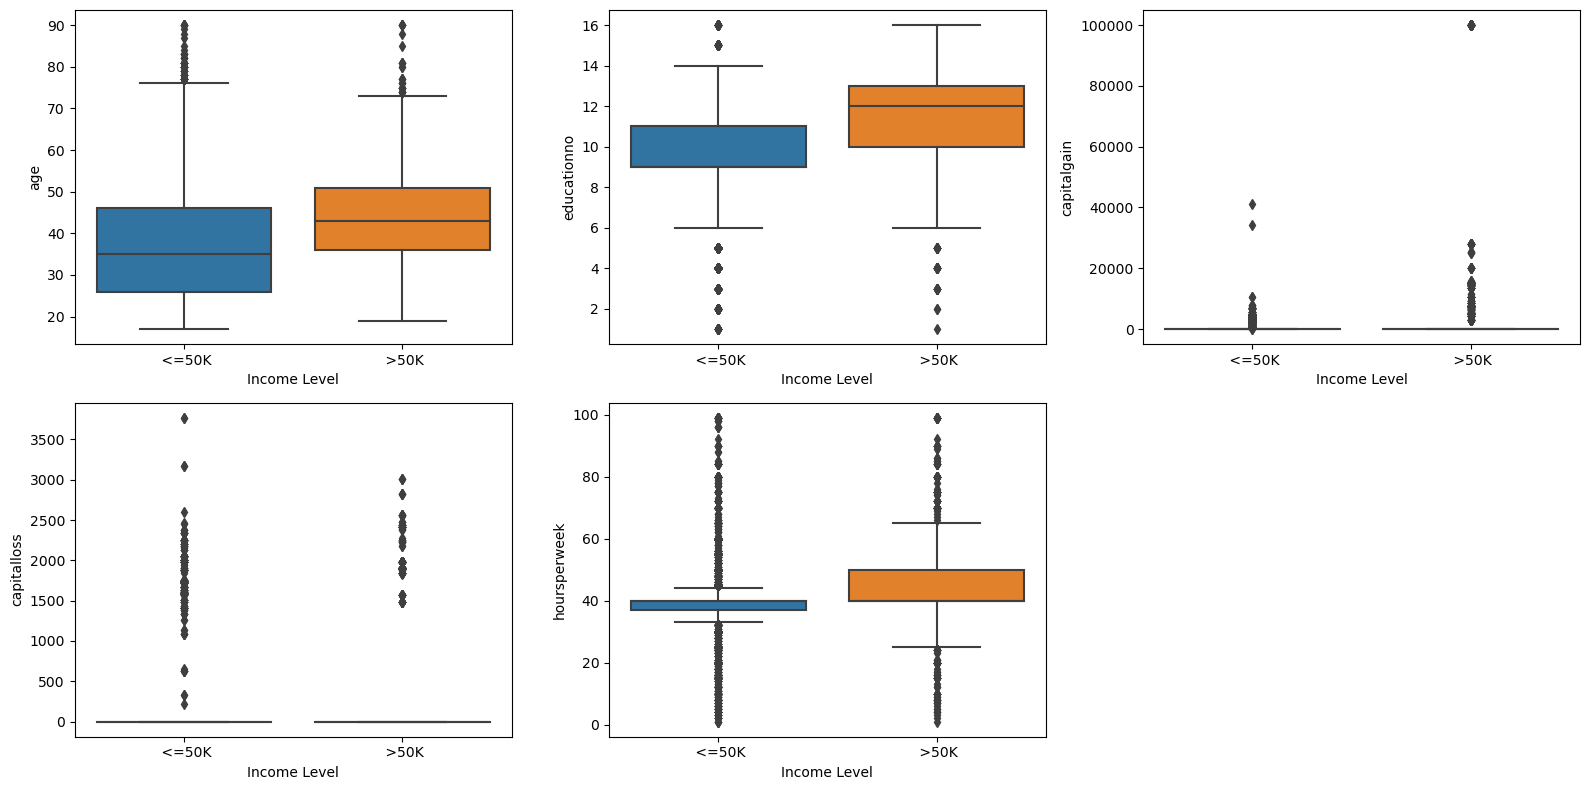

In [45]:
numeric_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
plt.figure(figsize=(16, 8))
for feature in numeric_features:
    plt.subplot(2, 3, numeric_features.index(feature) + 1)
    sns.boxplot(x='Salary', y=feature, data=test_set1)
    plt.xlabel('Income Level')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [25]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1].values

X_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,-1].values

In [26]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 1]]


In [28]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
accuracy = accuracy_score(y_test, y_pred)

Confusion matrix

 [[8570 2050]
 [ 700 2810]]

True Positives(TP) =  8570

True Negatives(TN) =  2810

False Positives(FP) =  2050

False Negatives(FN) =  700


In [29]:
print("The Accurary for the model is: ",accuracy*100)

The Accurary for the model is:  80.5378627034678


In [30]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.8070
Test set score: 0.8054


<Axes: >

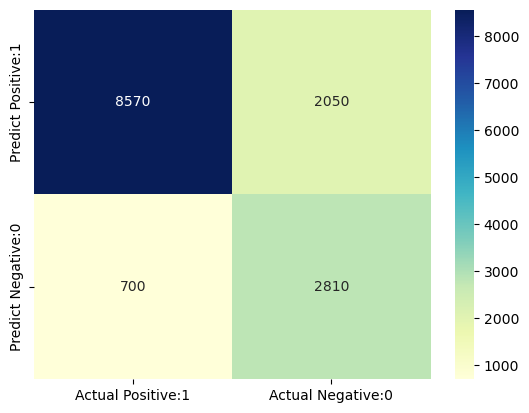

In [31]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')